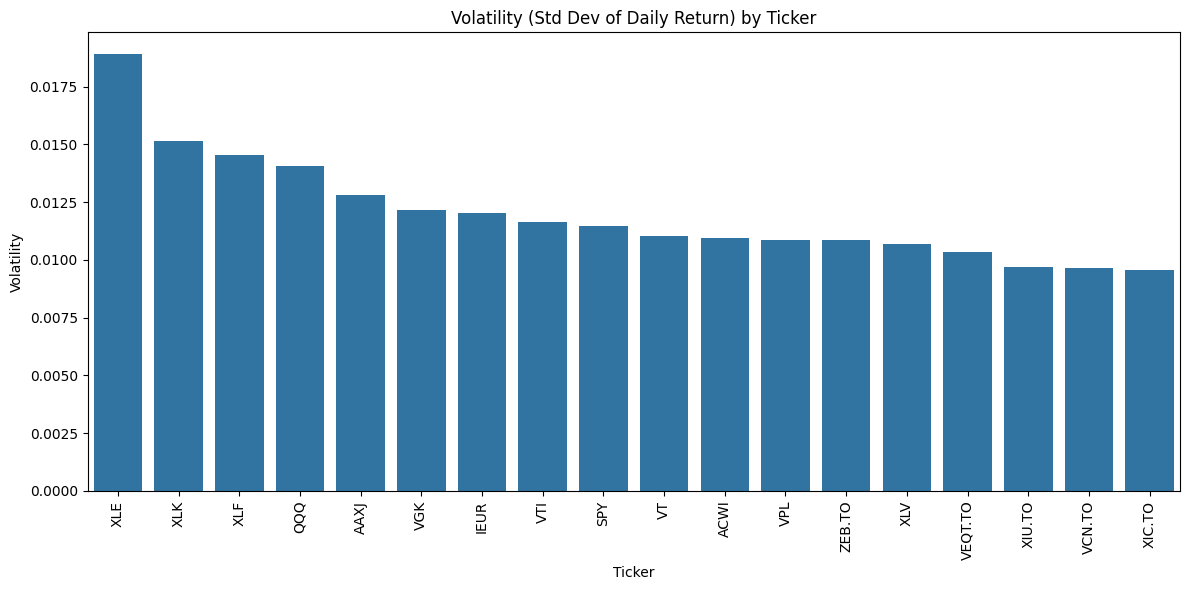

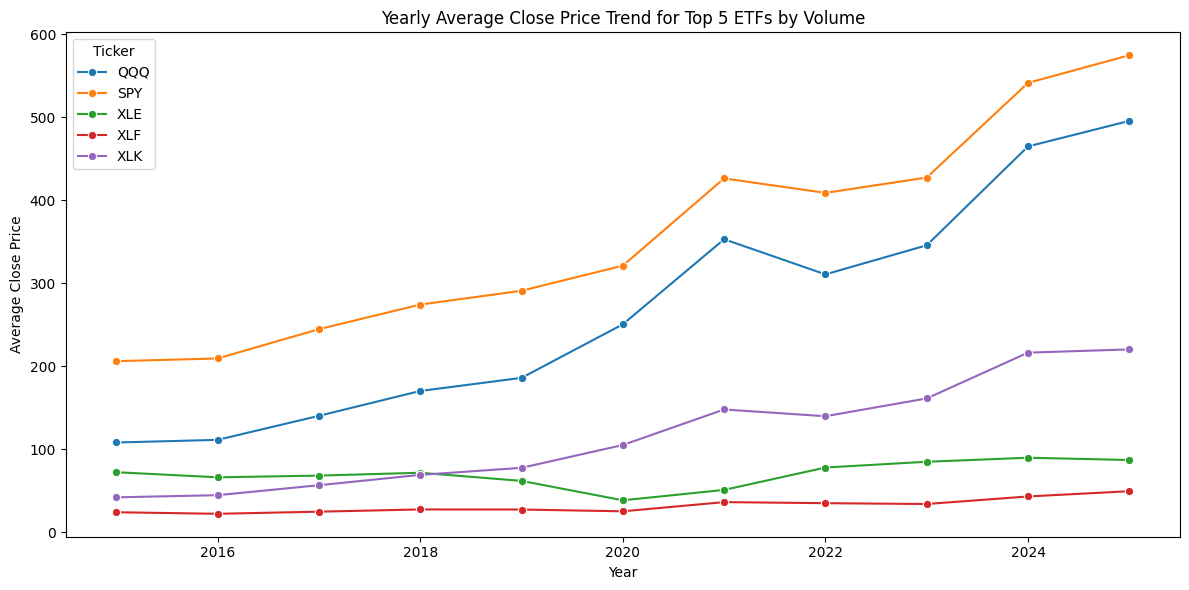

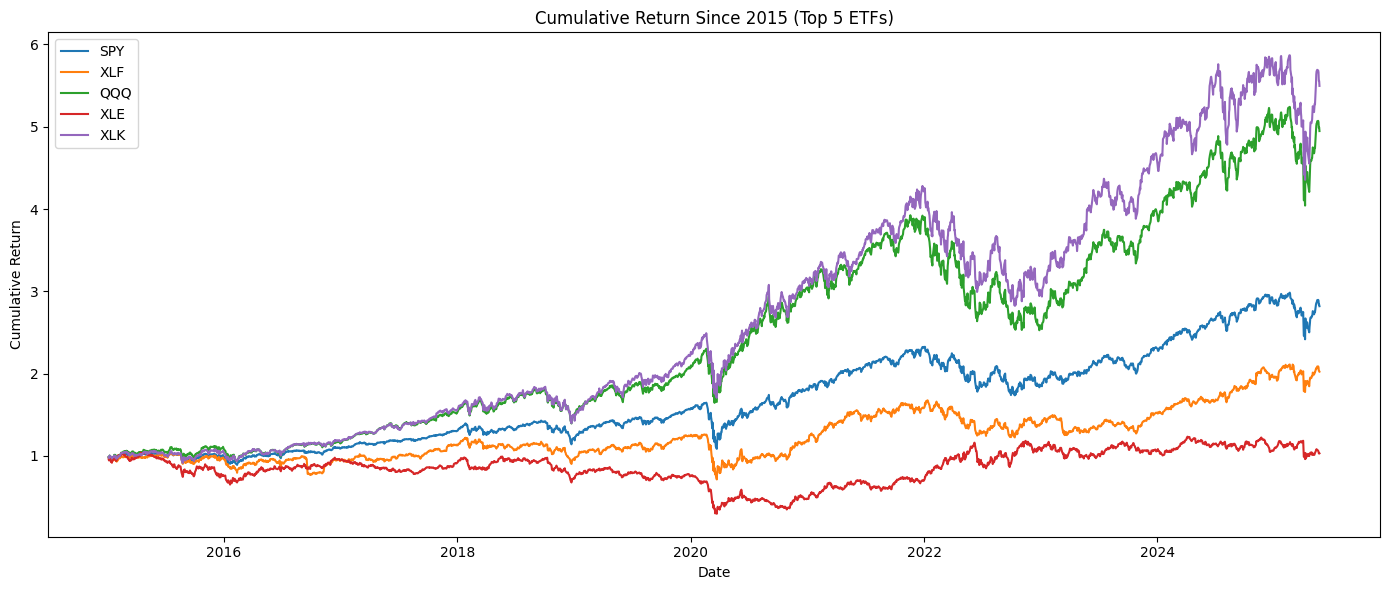

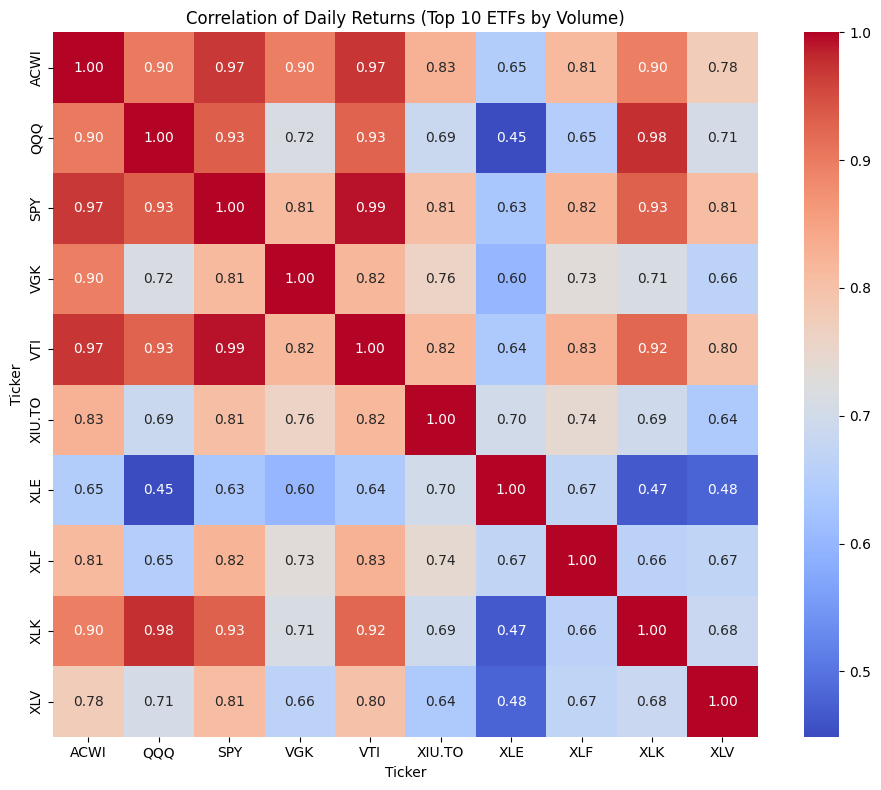

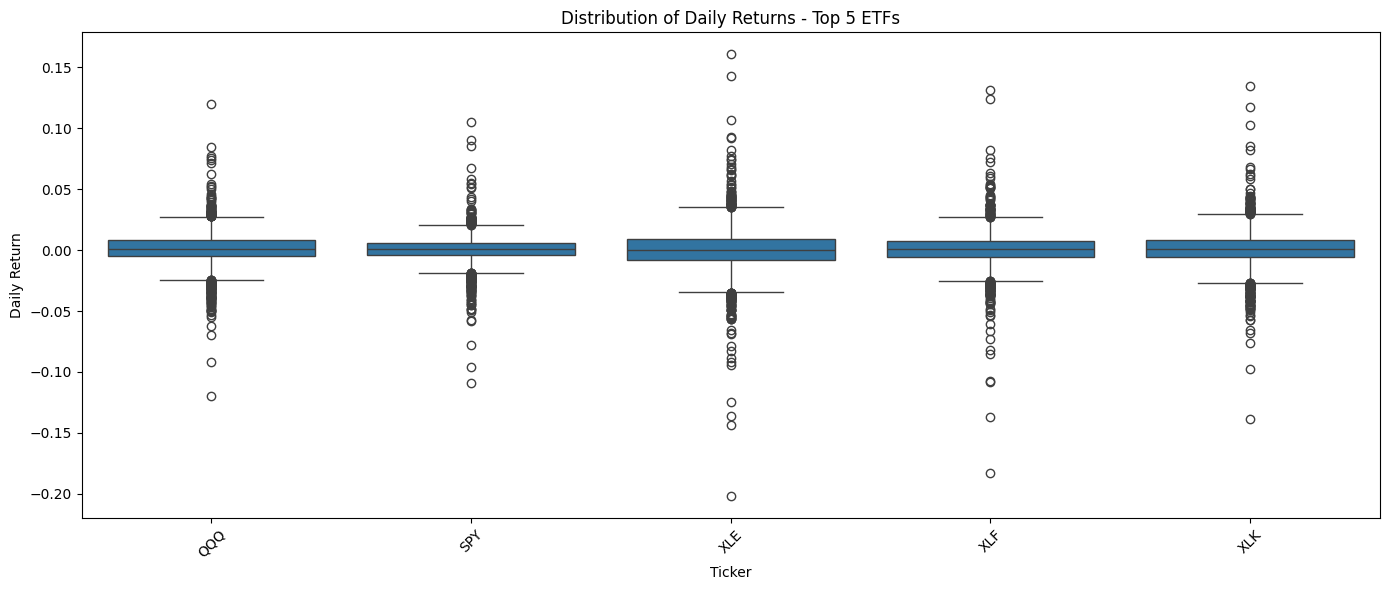

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loaded the combined ETF data file
file_path = r"C:\Users\Acer\Stockify\Data\ETF_data_global\Combined_global_ETFs.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])

# Prepared data for visualization
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')
df['Daily Return'] = df.groupby('Ticker')['Close'].pct_change()

# Insights : Volatility (std of daily returns) by ETF
volatility = df.groupby('Ticker')['Daily Return'].std().sort_values(ascending=False)
"""
Volatility means how much the price goes up and down daily.

Some ETFs (like sector-specific or emerging market ones) are more volatile, which means more risk.

Others are more stable, which investors may prefer for safer long-term investments.

Why it matters: If you're a cautious investor, you might prefer low-volatility ETFs. High-volatility ones might suit risk-takers or short-term traders.
"""

# insights : Yearly price trend (Close price) for top ETFs by volume
top_etfs = df.groupby('Ticker')['Volume'].sum().sort_values(ascending=False).head(5).index
trend_data = df[df['Ticker'].isin(top_etfs)].groupby(['Year', 'Ticker'])['Close'].mean().reset_index()

"""
This chart shows how the average prices of the 5 most-traded ETFs have changed each year since 2015.

You can clearly see trends — some ETFs grew steadily, others had ups and downs (like around 2020, which was COVID crash).

It helps visualize long-term performance.

Why it matters: Good for deciding which ETFs are stable over time, which follow the market trend, and which may be recovering or declining.
"""

# Insights: Cumulative return since 2015
df['Cumulative Return'] = df.groupby('Ticker')['Daily Return'].transform(lambda x: (1 + x).cumprod())

"""
What it shows:

This chart tracks the total return over time for each ETF, assuming you invested $1 at the beginning (2015).

It compounds daily returns to show growth trajectory.

Key Insights:

You can see which ETFs performed best over the long term.

Sharp inclines indicate strong growth periods (e.g., post-COVID rally).

Flat or declining trends may highlight underperforming assets or corrections.

Use Case:
Investors and portfolio managers use this to select ETFs that offer long-term capital appreciation.
"""

#  Insights: Correlation of daily returns among top ETFs
top_volume_tickers = df.groupby('Ticker')['Volume'].sum().sort_values(ascending=False).head(10).index
corr_df = df[df['Ticker'].isin(top_volume_tickers)].pivot(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = corr_df.corr()

"""
What it shows:

The Pearson correlation between daily returns of ETFs.

Values range from -1 to 1:

1 = perfect positive correlation

0 = no correlation

-1 = perfect inverse correlation

Key Insights:

Highly correlated ETFs (close to 1) tend to move together (e.g., SPY & QQQ).

Low correlation ETFs add diversification benefits, lowering portfolio risk.

Use Case:
Used in risk management and portfolio construction to combine assets that don’t all crash together.
"""

#  Insights: Distribution of daily returns for top 5 ETFs
top5 = top_volume_tickers[:5]
dist_data = df[df['Ticker'].isin(top5)]

"""
What it shows:

A boxplot for each ETF showing:

Median (middle line)

IQR (box: 25–75th percentile)

Whiskers and outliers

Key Insights:

Wide box/whiskers = high volatility (risk)

Skewed box = asymmetric risk (e.g., more crashes than rallies)

Some ETFs show many outliers, indicating frequent extreme moves.

Use Case:
Helps compare risk-adjusted behavior — not just which ETF returns more, but which is more stable.
"""

# Plotting

plt.figure(figsize=(12, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title("Volatility (Std Dev of Daily Return) by Ticker")
plt.ylabel("Volatility")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='Year', y='Close', hue='Ticker', marker='o')
plt.title("Yearly Average Close Price Trend for Top 5 ETFs by Volume")
plt.ylabel("Average Close Price")
plt.tight_layout()
plt.show()

# Plot cumulative return
plt.figure(figsize=(14, 6))
for ticker in top5:
    sub_df = df[df['Ticker'] == ticker]
    plt.plot(sub_df['Date'], sub_df['Cumulative Return'], label=ticker)
plt.legend()
plt.title("Cumulative Return Since 2015 (Top 5 ETFs)")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation of Daily Returns (Top 10 ETFs by Volume)")
plt.tight_layout()
plt.show()

# Distribution of daily returns
plt.figure(figsize=(14, 6))
sns.boxplot(x='Ticker', y='Daily Return', data=dist_data)
plt.title("Distribution of Daily Returns - Top 5 ETFs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
